# Overview:

#### Aim: Predicting customer expenditure using customer information ([Source of dataset (Kaggle)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis))
#### What we going to do in this notebook:
1. Do an overview on dataset
2. Checking every variable given in the dataset

# Data exploratary

## (0) Import Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
customerData = pd.read_csv('dataset\marketing_campaign.csv',sep='\t')

We also set up some of the utility function, which will help with the visualization later.

In [3]:
def histogramCountOld(dataset,x):
    
    import seaborn as sb
    
    #Cite M2 ExploratoryAnalysis
    print("Number of", x ,":", len(dataset[x].unique()))
    
    print(dataset[x].value_counts())
    sb.catplot(y = x, data = dataset, kind = "count")

In [4]:
def plotlyDist(dataset,x,binSize):
    
    import plotly.graph_objects as go
    import plotly.figure_factory as ff
    from plotly.subplots import make_subplots
    
    fig0 = ff.create_distplot([dataset[x].values], [x],bin_size = binSize)

    fig = make_subplots(rows=2, cols=1,
                        subplot_titles=(x,""),
                       row_heights=[0.2,0.8],
                       vertical_spacing=0.02)

    box0 = go.Box(x = dataset[x],legendgroup = x,showlegend = False,name = "")
    trace0 = go.Histogram(fig0['data'][0],legendgroup = x,marker_color='DarkOrchid')
    line0 = go.Scatter(fig0['data'][1],legendgroup = x,line=dict(color='RebeccaPurple',width=1))

    fig.append_trace(box0, 1, 1)
    fig.append_trace(trace0, 2, 1)
    fig.append_trace(line0, 2, 1)

    fig.update_layout(height=500)
    fig.show()

In [5]:
def numVarDetails(dataset,x,meta = {}):
    
    import seaborn as sb
    # Cite M2 BasicStatistics
    # Set up matplotlib figure with three subplots
    if(len(meta) != 0):
        f, axes = plt.subplots(1, 3, figsize=(meta["width"], meta["height"]))
    else:
        f, axes = plt.subplots(1, 3, figsize=(5, 15))

    # Plot the basic uni-variate figures for HP
    sb.boxplot(data = dataset[x], orient = "h", ax = axes[0])
    sb.histplot(data = dataset[x], ax = axes[1])
    sb.violinplot(data = dataset[x], orient = "h", ax = axes[2])

## (1) Basic Exploratory 

We will do an overview on dataset here.

In [18]:
customerData

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [19]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Based on the description on the dataset, we can convert some of the variables' data types to categorical, to help with the exploratary. 

In [23]:
colOfNum = []
colOfCat = []
for col in customerData:
    if str(customerData[col].dtypes) != "int64" and str(customerData[col].dtypes) != "float64":
        colOfCat.append(str(col))
    else:
        colOfNum.append(str(col))
        
colOfCat.extend(['Complain','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'])

for element in ['Complain','Kidhome','Teenhome','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']:
    colOfNum.remove(element)
    
print("Column which consider as Numerical Data:\n", colOfNum)
print()
print("Column which consider as Categorical Data:\n",colOfCat)

Column which consider as Numerical Data:
 ['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

Column which consider as Categorical Data:
 ['Education', 'Marital_Status', 'Dt_Customer', 'Complain', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']


In [24]:
customerData[colOfNum].describe()

ID   Year_Birth         Income      Recency     MntWines  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354    49.109375   303.935714   
std     3246.662198    11.984069   25173.076661    28.962453   336.597393   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000    24.000000    23.750000   
50%     5458.500000  1970.000000   51381.500000    49.000000   173.500000   
75%     8427.750000  1977.000000   68522.000000    74.000000   504.250000   
max    11191.000000  1996.000000  666666.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2240.000000        2240.000000      2240.000000          2240.000000   
mean      44.021875           2.325000         4.084821             2.662054   
std       52.167439           1.932238         2.778714             2.923101   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  Z_CostContact  Z_Revenue  
count        2240.000000        2240.000000         2240.0     2240.0  
mean            5.790179           5.316518            3.0       11.0  
std             3.250958           2.426645            0.0        0.0  
min             0.000000           0.000000            3.0       11.0  
25%             3.000000           3.000000            3.0       11.0  
50%             5.000000           6.000000            3.0       11.0  
75%             8.000000           7.000000            3.0       11.0  
max            13.000000          20.000000            3.0       11.0

In [25]:
customerData[colOfCat].describe()

Complain      Kidhome     Teenhome  AcceptedCmp1  AcceptedCmp2  \
count  2240.000000  2240.000000  2240.000000   2240.000000   2240.000000   
mean      0.009375     0.444196     0.506250      0.064286      0.013393   
std       0.096391     0.538398     0.544538      0.245316      0.114976   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.000000     0.000000      0.000000      0.000000   
50%       0.000000     0.000000     0.000000      0.000000      0.000000   
75%       0.000000     1.000000     1.000000      0.000000      0.000000   
max       1.000000     2.000000     2.000000      1.000000      1.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5     Response  
count   2240.000000   2240.000000   2240.000000  2240.000000  
mean       0.072768      0.074554      0.072768     0.149107  
std        0.259813      0.262728      0.259813     0.356274  
min        0.000000      0.000000      0.000000     0.000000  
25%        0.000000      0.000000      0.000000     0.000000  
50%        0.000000      0.000000      0.000000     0.000000  
75%        0.000000      0.000000      0.000000     0.000000  
max        1.000000      1.000000      1.000000     1.000000

## One-by-one observation on each columns

### 0   ID

From the description in Kaggle, we know ID is customer identifier, which does not show anything interesting.

In [9]:
customerData["ID"].describe()

count     2240.000000
mean      5592.159821
std       3246.662198
min          0.000000
25%       2828.250000
50%       5458.500000
75%       8427.750000
max      11191.000000
Name: ID, dtype: float64

In [8]:
plotlyDist(customerData,"ID",binSize = 10)

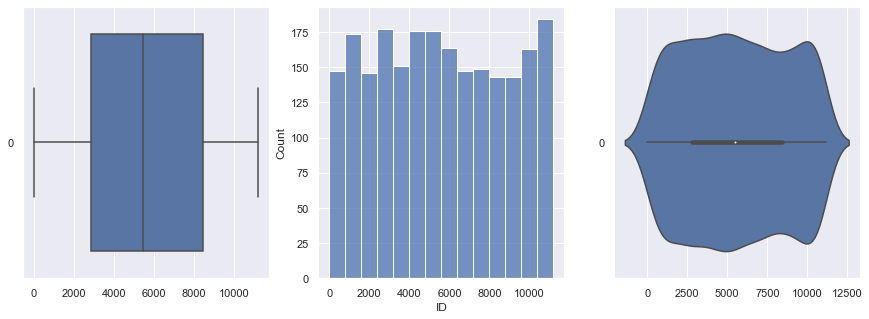

In [68]:
numVarDetails(customerData,"ID",meta = {"height":5,"width":15})

### 1   Year_Birth

We realise this variable can be confusing as we do not know when the data is collected.  

We then decide to make a new variable out of this. [YearRange](Data-cleaning.ipynb).

In [70]:
plotlyDist(customerData,"Year_Birth",binSize = 5)

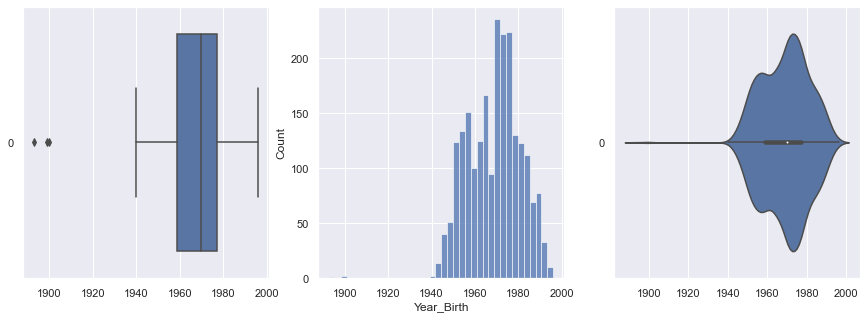

In [72]:
numVarDetails(customerData,"Year_Birth",meta = {"height":5,"width":15})

### 2   Education

Number of Education : 5
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


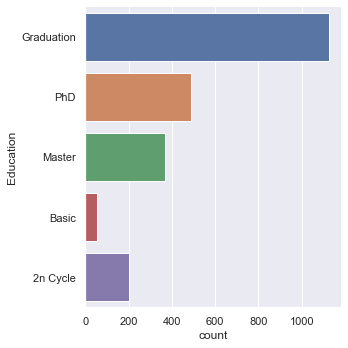

In [76]:
histogramCountOld(customerData,"Education")

In [20]:
customerNumData.describe()

ID   Year_Birth         Income      Recency     MntWines  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354    49.109375   303.935714   
std     3246.662198    11.984069   25173.076661    28.962453   336.597393   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000    24.000000    23.750000   
50%     5458.500000  1970.000000   51381.500000    49.000000   173.500000   
75%     8427.750000  1977.000000   68522.000000    74.000000   504.250000   
max    11191.000000  1996.000000  666666.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2240.000000      2240.000000      2240.000000       2240.000000   
mean     26.302232       166.950000        37.525446         27.062946   
std      39.773434       225.715373        54.628979         41.280498   
min       0.000000         0.000000         0.000000          0.000000   
25%       1.000000        16.000000         3.000000          1.000000   
50%       8.000000        67.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         33.000000   
max     199.000000      1725.000000       259.000000        263.000000   

       MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count   2240.000000        2240.000000      2240.000000          2240.000000   
mean      44.021875           2.325000         4.084821             2.662054   
std       52.167439           1.932238         2.778714             2.923101   
min        0.000000           0.000000         0.000000             0.000000   
25%        9.000000           1.000000         2.000000             0.000000   
50%       24.000000           2.000000         4.000000             2.000000   
75%       56.000000           3.000000         6.000000             4.000000   
max      362.000000          15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  Z_CostContact  Z_Revenue  
count        2240.000000        2240.000000         2240.0     2240.0  
mean            5.790179           5.316518            3.0       11.0  
std             3.250958           2.426645            0.0        0.0  
min             0.000000           0.000000            3.0       11.0  
25%             3.000000           3.000000            3.0       11.0  
50%             5.000000           6.000000            3.0       11.0  
75%             8.000000           7.000000            3.0       11.0  
max            13.000000          20.000000            3.0       11.0

In [21]:
customerCatData.describe()

Education Marital_Status Dt_Customer  AcceptedCmp3  AcceptedCmp4  \
count         2240           2240        2240          2240          2240   
unique           5              8         663             2             2   
top     Graduation        Married  31-08-2012             0             0   
freq          1127            864          12          2077          2073   

        AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Kidhome  \
count           2240          2240          2240      2240      2240     2240   
unique             2             2             2         2         2        3   
top                0             0             0         0         0        0   
freq            2077          2096          2210      2219      1906     1293   

        Teenhome  
count       2240  
unique         3  
top            0  
freq        1158

In [22]:
customerNumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Recency              2240 non-null   int64  
 4   MntWines             2240 non-null   int64  
 5   MntFruits            2240 non-null   int64  
 6   MntMeatProducts      2240 non-null   int64  
 7   MntFishProducts      2240 non-null   int64  
 8   MntSweetProducts     2240 non-null   int64  
 9   MntGoldProds         2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  Z_CostContact        2240 non-null   i

In [23]:
customerCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Education       2240 non-null   category
 1   Marital_Status  2240 non-null   category
 2   Dt_Customer     2240 non-null   category
 3   AcceptedCmp3    2240 non-null   category
 4   AcceptedCmp4    2240 non-null   category
 5   AcceptedCmp5    2240 non-null   category
 6   AcceptedCmp1    2240 non-null   category
 7   AcceptedCmp2    2240 non-null   category
 8   Complain        2240 non-null   category
 9   Response        2240 non-null   category
 10  Kidhome         2240 non-null   category
 11  Teenhome        2240 non-null   category
dtypes: category(12)
memory usage: 51.6 KB


In [32]:
customerData["Dt_Customer"].describe()

count           2240
unique           663
top       31-08-2012
freq              12
Name: Dt_Customer, dtype: object

<AxesSubplot:xlabel='Dt_Customer', ylabel='MntWines'>

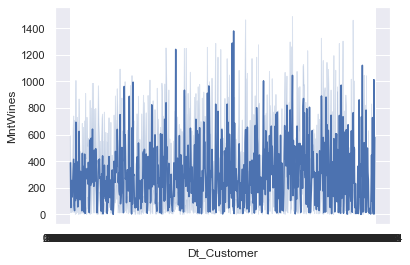

In [29]:
sb.lineplot(data=customerData, x="Dt_Customer",y = "Income")

<AxesSubplot:xlabel='Dt_Customer', ylabel='MntWines'>

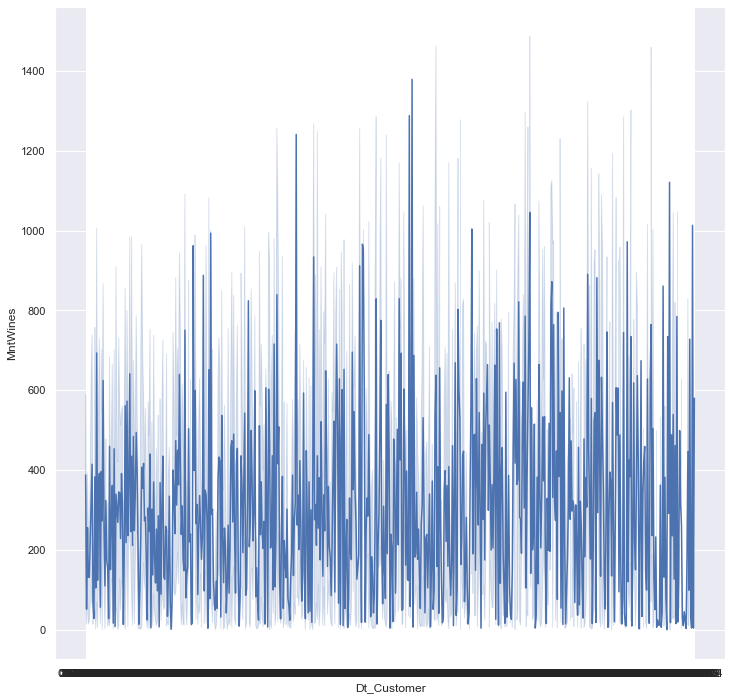

In [30]:
f = plt.figure(figsize=(12, 12))
sb.lineplot(data=customerData, x="Dt_Customer",y = "MntWines")

Number of NumWebVisitsMonth: 16
7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64


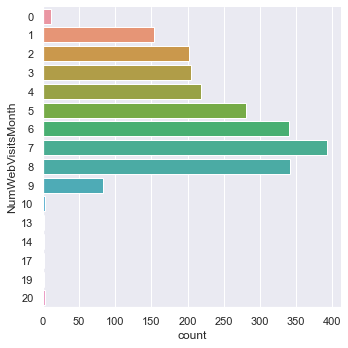

In [25]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of NumWebVisitsMonth:", len(customerNumData["NumWebVisitsMonth"].unique()))

# Pokemons in each Generation
print(customerNumData["NumWebVisitsMonth"].value_counts())
sb.catplot(y = "NumWebVisitsMonth", data = customerNumData, kind = "count")

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='MntGoldProds'>

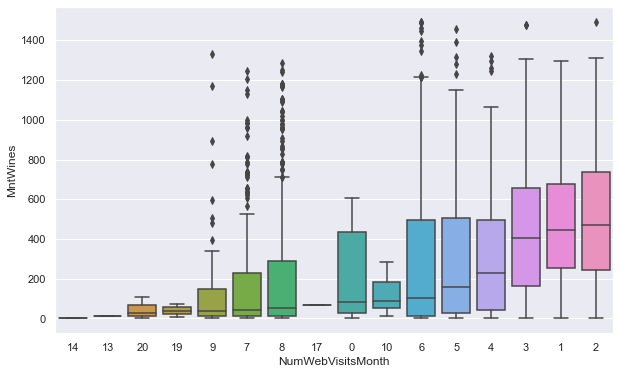

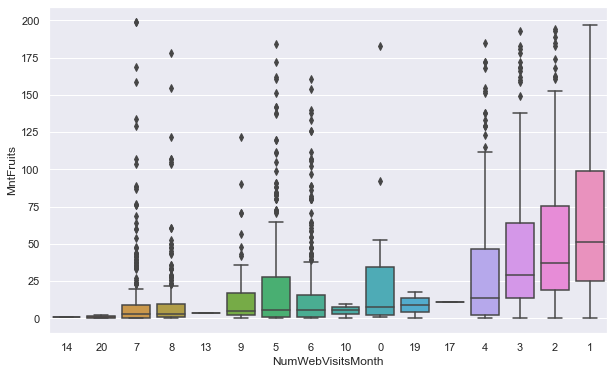

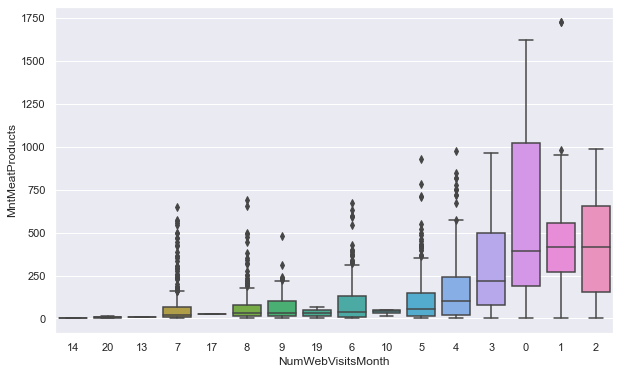

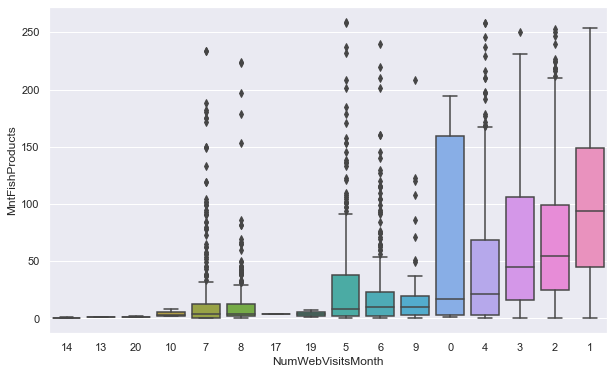

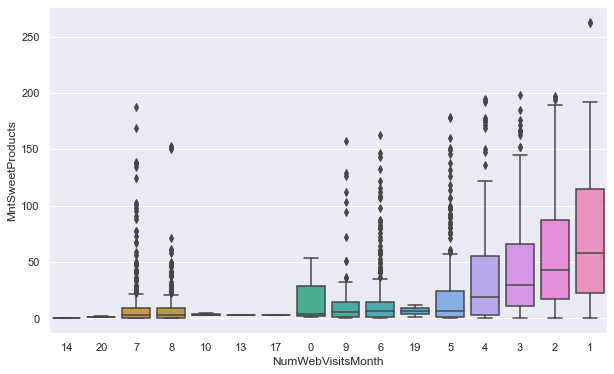

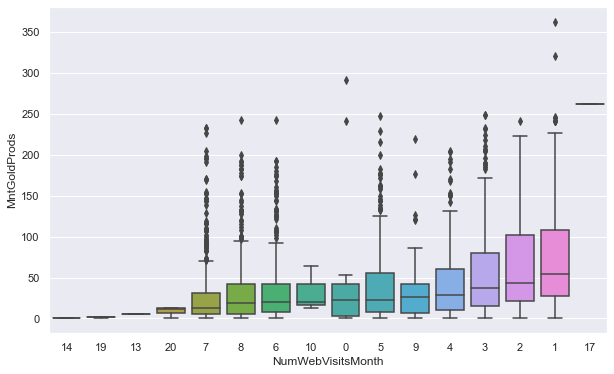

In [20]:
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['NumWebVisitsMonth', 'MntWines']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData['NumWebVisitsMonth'],y = customerData['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['NumWebVisitsMonth', 'MntFruits']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData['NumWebVisitsMonth'],y = customerData['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['NumWebVisitsMonth', 'MntMeatProducts']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData['NumWebVisitsMonth'],y = customerData['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['NumWebVisitsMonth', 'MntFishProducts']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData['NumWebVisitsMonth'],y = customerData['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['NumWebVisitsMonth', 'MntSweetProducts']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData['NumWebVisitsMonth'],y = customerData['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['NumWebVisitsMonth', 'MntGoldProds']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData['NumWebVisitsMonth'],y = customerData['MntGoldProds'],order=grouped.index,orient = "v")

Number of Education: 5
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


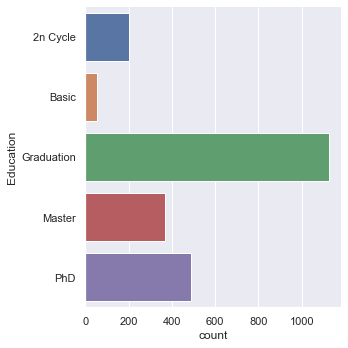

In [17]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Education:", len(customerCatData["Education"].unique()))

# Pokemons in each Generation
print(customerCatData["Education"].value_counts())
sb.catplot(y = "Education", data = customerCatData, kind = "count")

Number of Marital_Status: 8
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


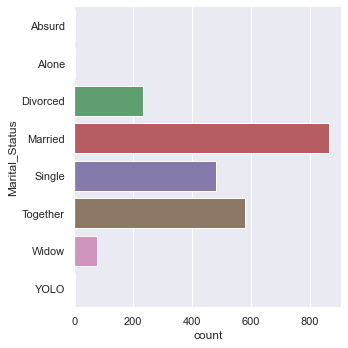

In [18]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Marital_Status:", len(customerCatData["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerCatData["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerCatData, kind = "count")

Number of Complain: 2
0    2219
1      21
Name: Complain, dtype: int64


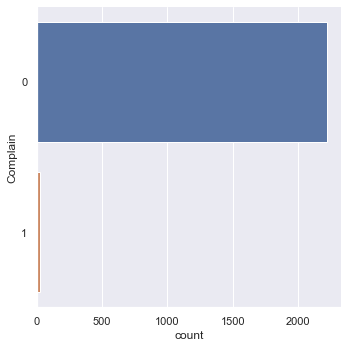

In [19]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Complain:", len(customerCatData["Complain"].unique()))

# Pokemons in each Generation
print(customerCatData["Complain"].value_counts())
sb.catplot(y = "Complain", data = customerCatData, kind = "count")

Number of Response: 2
0    1906
1     334
Name: Response, dtype: int64


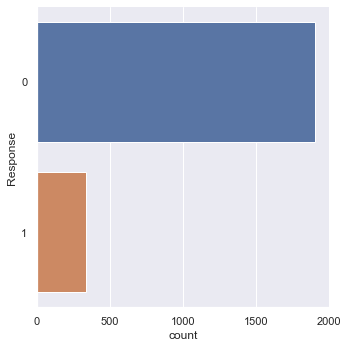

In [20]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Response:", len(customerCatData["Response"].unique()))

# Pokemons in each Generation
print(customerCatData["Response"].value_counts())
sb.catplot(y = "Response", data = customerCatData, kind = "count")

Number of Kidhome: 3
0    1293
1     899
2      48
Name: Kidhome, dtype: int64


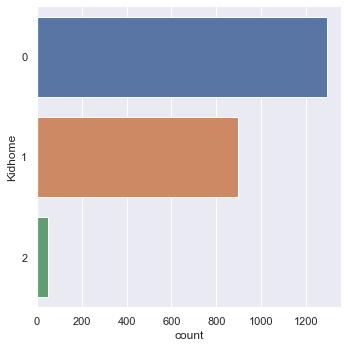

In [21]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Kidhome:", len(customerCatData["Kidhome"].unique()))

# Pokemons in each Generation
print(customerCatData["Kidhome"].value_counts())
sb.catplot(y = "Kidhome", data = customerCatData, kind = "count")

Number of Teenhome: 3
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


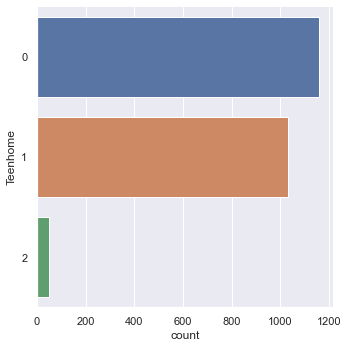

In [22]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Teenhome:", len(customerCatData["Teenhome"].unique()))

# Pokemons in each Generation
print(customerCatData["Teenhome"].value_counts())
sb.catplot(y = "Teenhome", data = customerCatData, kind = "count")

<AxesSubplot:>

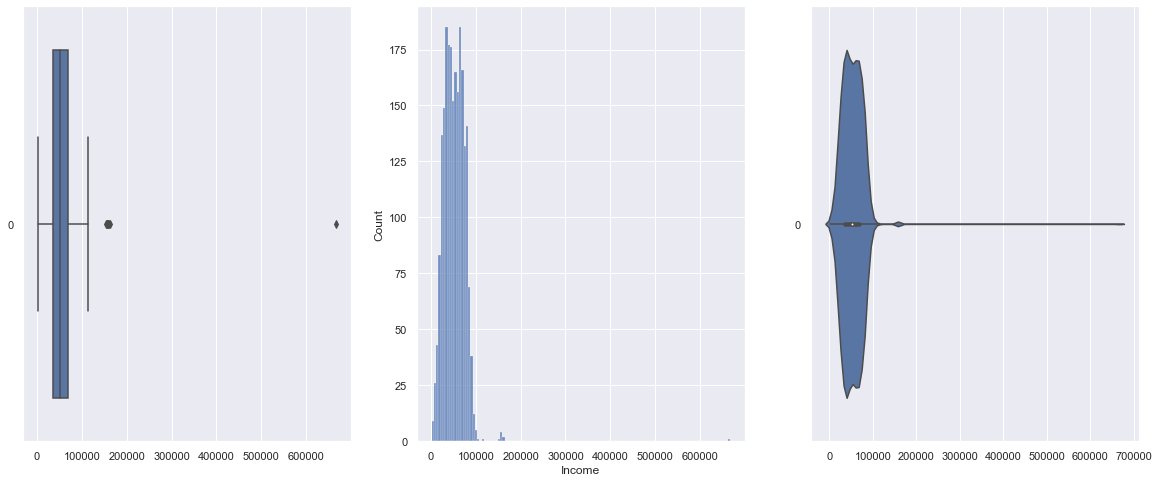

In [23]:
f, axes = plt.subplots(1,3, figsize=(20, 8))
sb.boxplot(data = customerNumData['Income'], orient = "h", ax = axes[0])
sb.histplot(data = customerNumData['Income'], ax = axes[1])
sb.violinplot(data = customerNumData['Income'], orient = "h", ax = axes[2])


<AxesSubplot:>

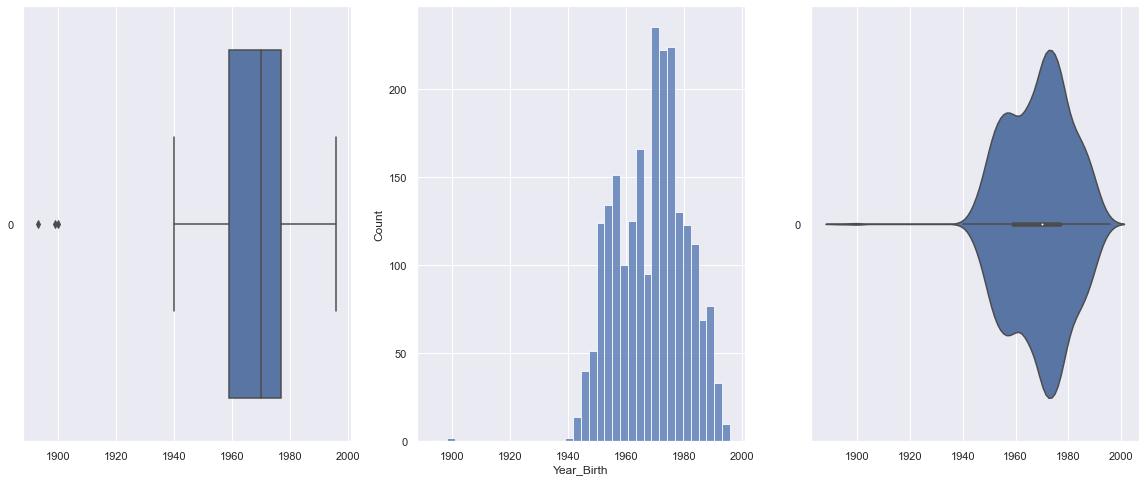

In [24]:
f, axes = plt.subplots(1,3, figsize=(20, 8))
sb.boxplot(data = customerNumData['Year_Birth'], orient = "h", ax = axes[0])
sb.histplot(data = customerNumData['Year_Birth'], ax = axes[1])
sb.violinplot(data = customerNumData['Year_Birth'], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Marital_Status', ylabel='MntGoldProds'>

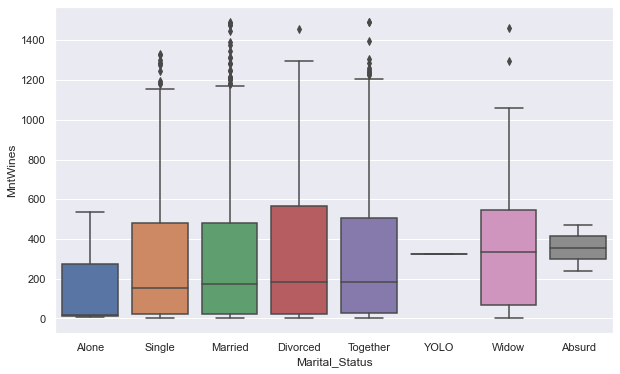

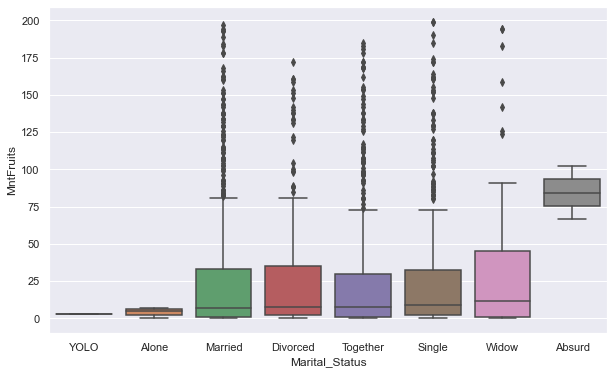

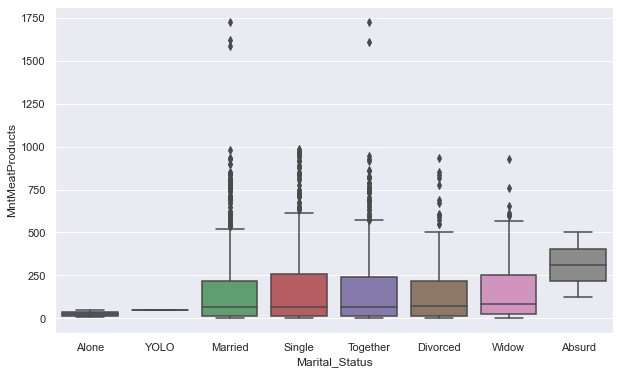

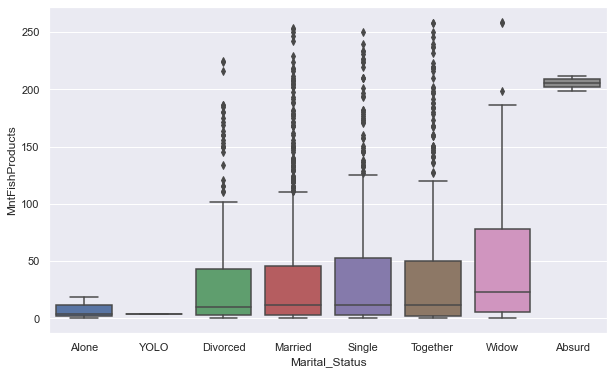

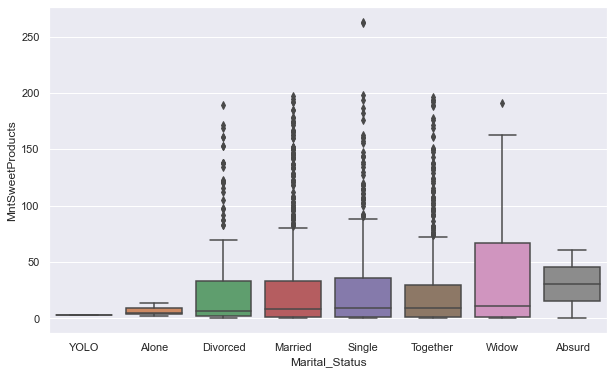

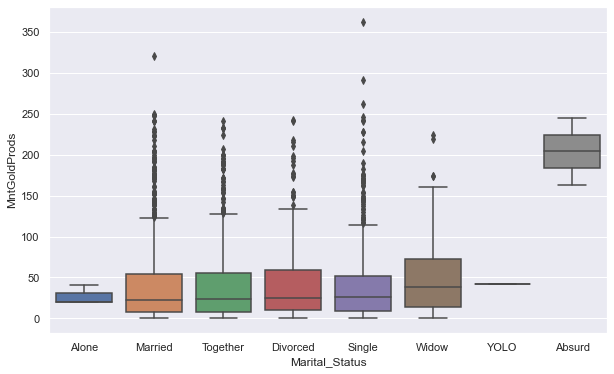

In [25]:
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntWines']].groupby(['Marital_Status']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntFruits']].groupby(['Marital_Status']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntMeatProducts']].groupby(['Marital_Status']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntFishProducts']].groupby(['Marital_Status']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntSweetProducts']].groupby(['Marital_Status']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntGoldProds']].groupby(['Marital_Status']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntGoldProds'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Education', ylabel='MntGoldProds'>

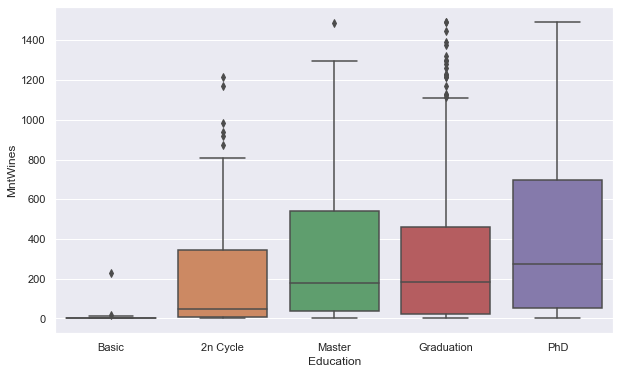

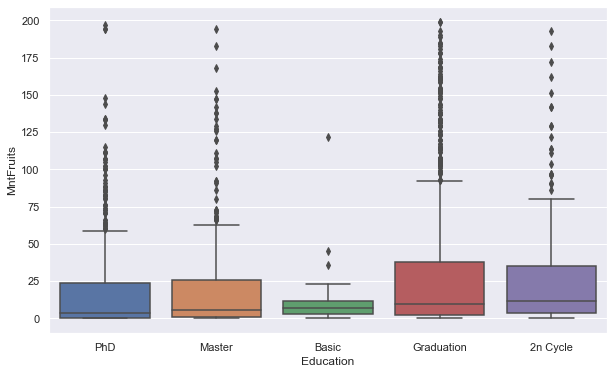

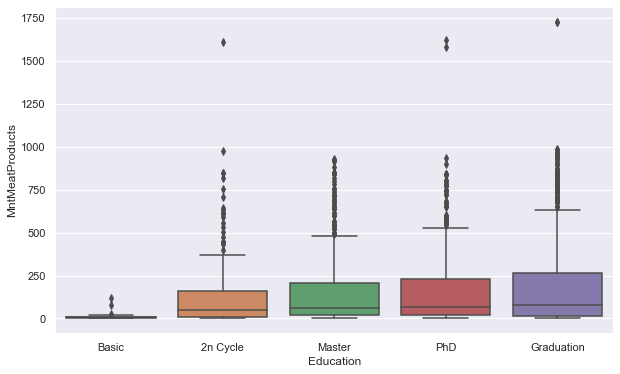

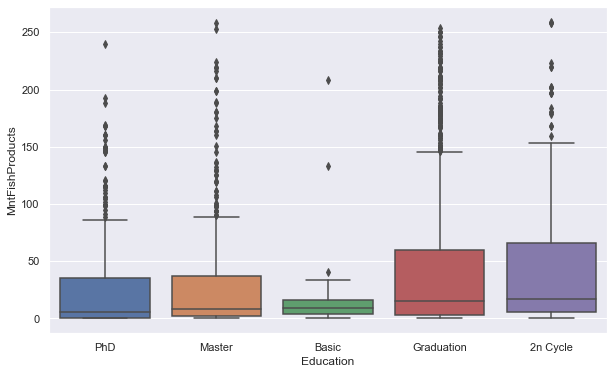

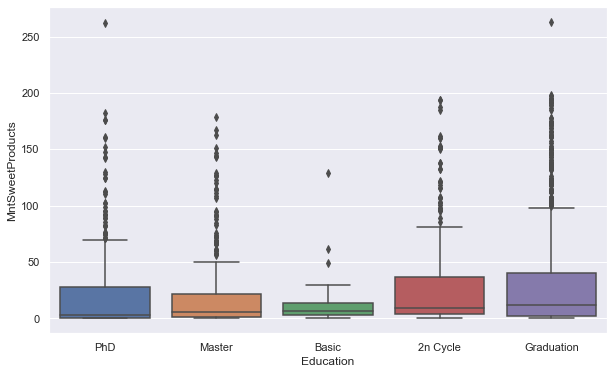

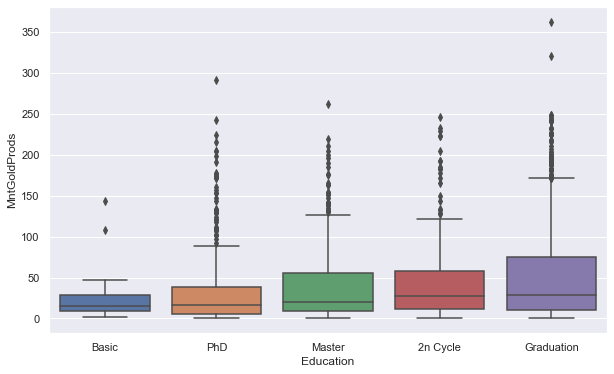

In [26]:
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntWines']].groupby(['Education']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData['Education'],y = customerData['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntFruits']].groupby(['Education']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData['Education'],y = customerData['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntMeatProducts']].groupby(['Education']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData['Education'],y = customerData['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntFishProducts']].groupby(['Education']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData['Education'],y = customerData['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntSweetProducts']].groupby(['Education']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData['Education'],y = customerData['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntGoldProds']].groupby(['Education']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData['Education'],y = customerData['MntGoldProds'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Kidhome', ylabel='MntGoldProds'>

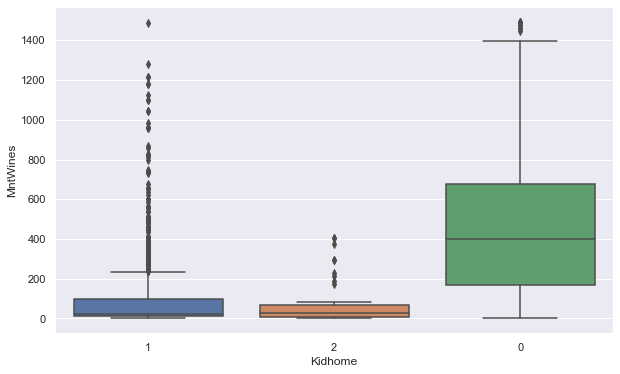

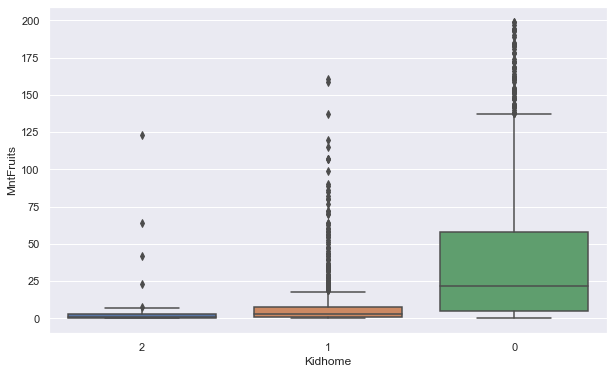

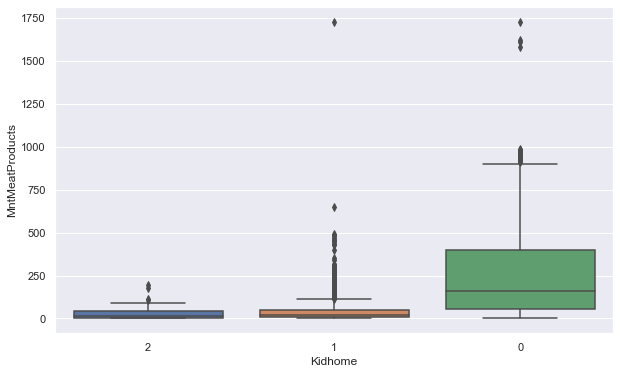

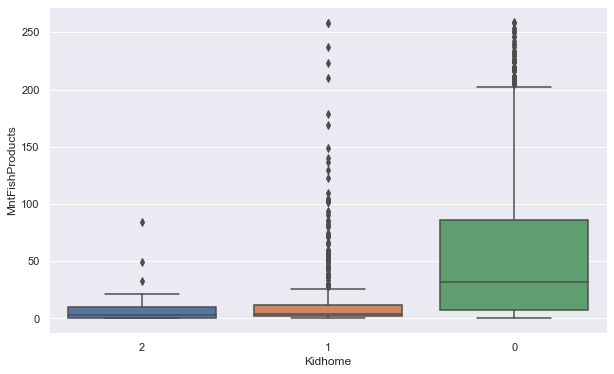

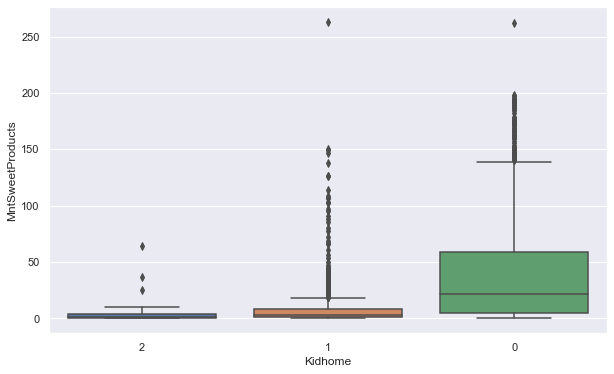

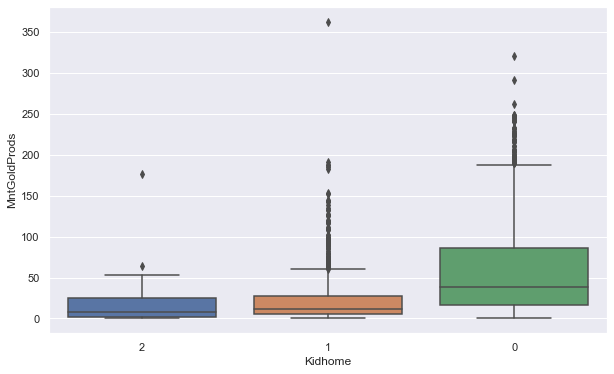

In [27]:
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntWines']].groupby(['Kidhome']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntFruits']].groupby(['Kidhome']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntMeatProducts']].groupby(['Kidhome']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntFishProducts']].groupby(['Kidhome']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntSweetProducts']].groupby(['Kidhome']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntGoldProds']].groupby(['Kidhome']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntGoldProds'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Teenhome', ylabel='MntGoldProds'>

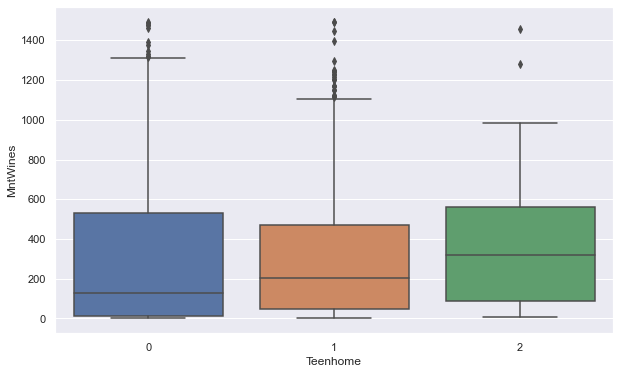

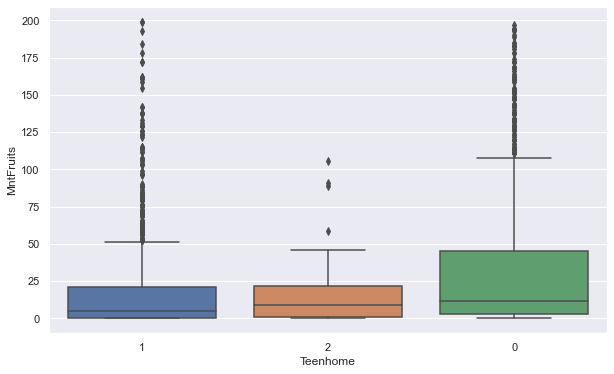

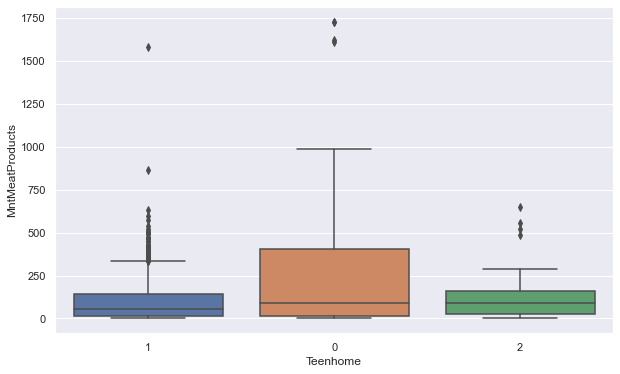

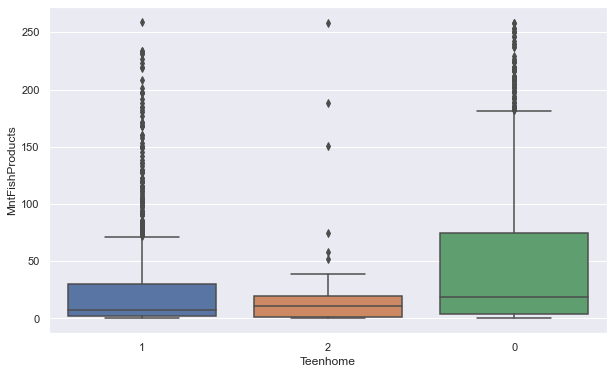

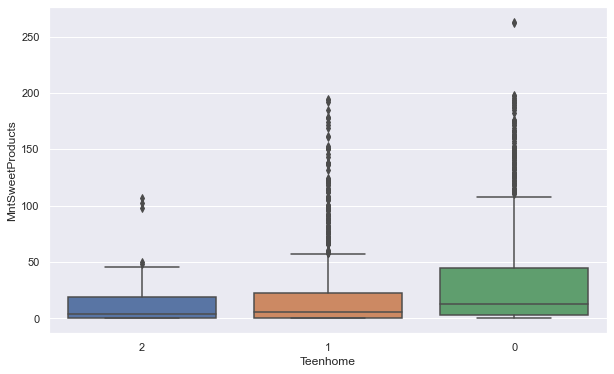

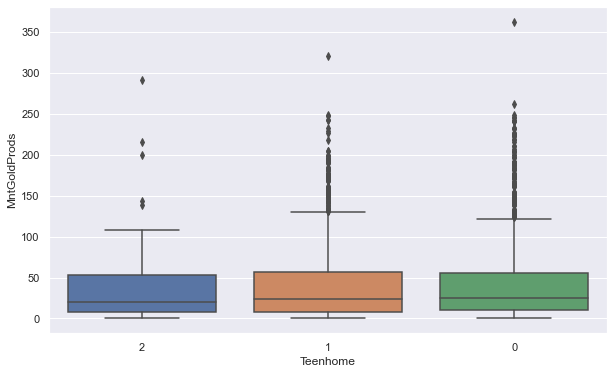

In [28]:
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntWines']].groupby(['Teenhome']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntFruits']].groupby(['Teenhome']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntMeatProducts']].groupby(['Teenhome']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntFishProducts']].groupby(['Teenhome']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntSweetProducts']].groupby(['Teenhome']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntGoldProds']].groupby(['Teenhome']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntGoldProds'],order=grouped.index,orient = "v")

<Figure size 144x432 with 0 Axes>

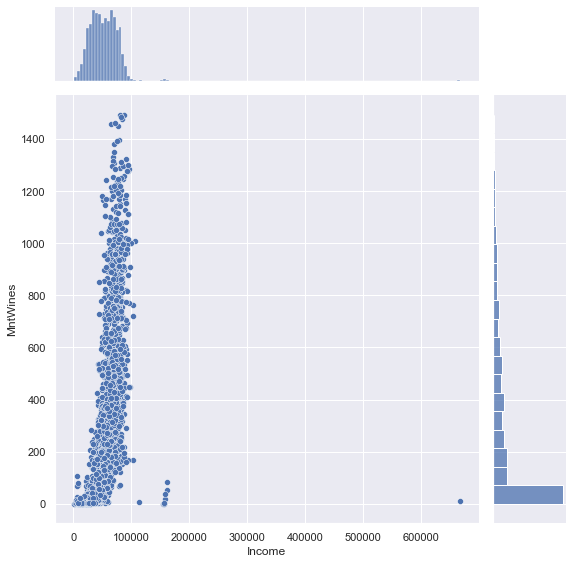

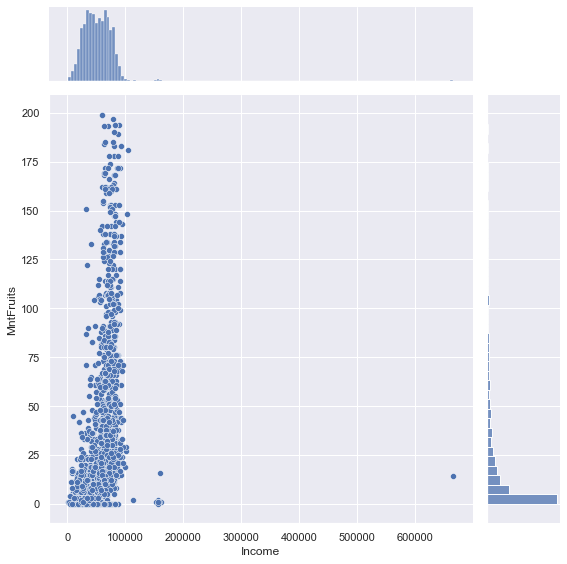

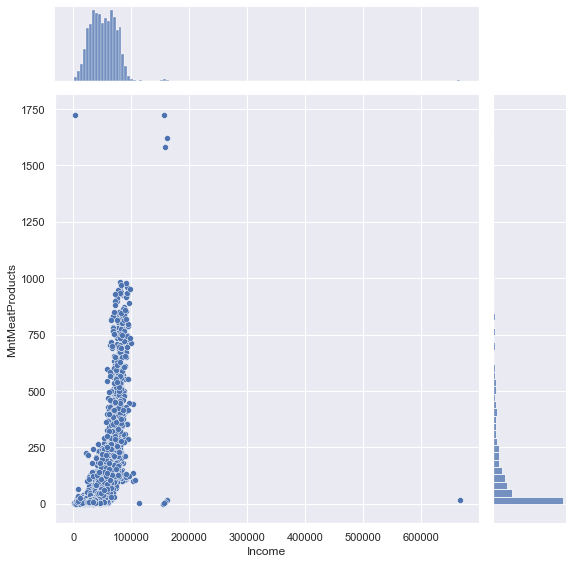

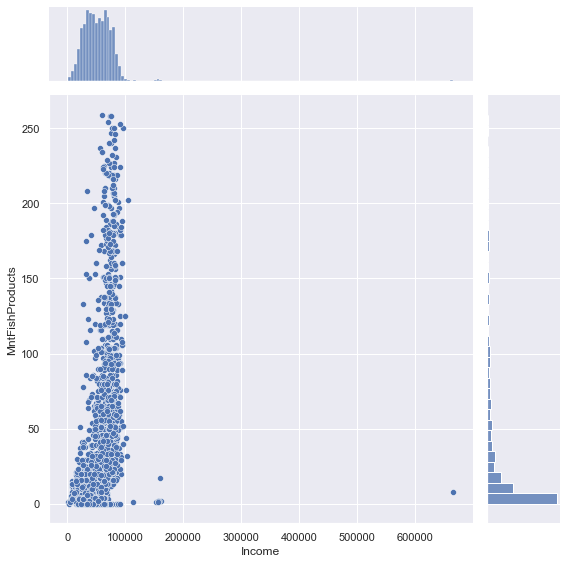

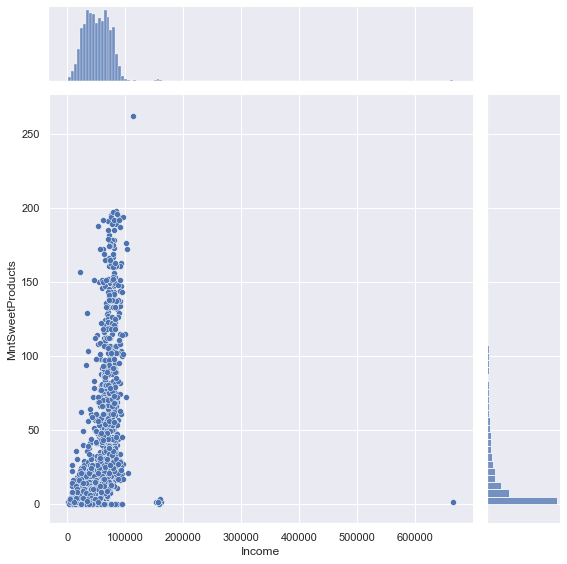

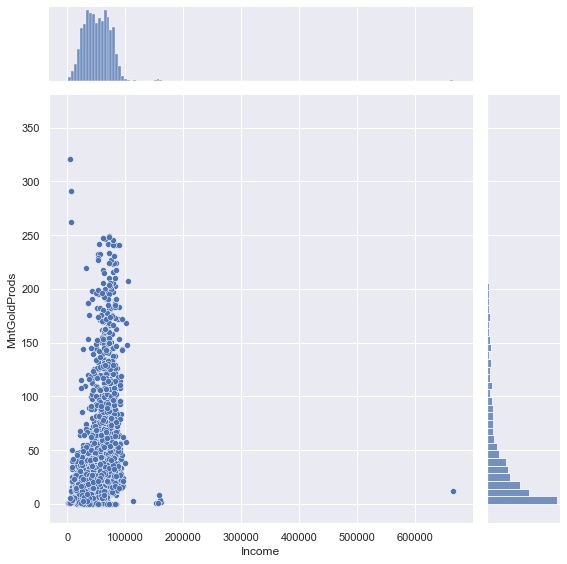

In [29]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntFruits", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntMeatProducts", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntFishProducts", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntSweetProducts", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntGoldProds", height = 8)

<Figure size 144x432 with 0 Axes>

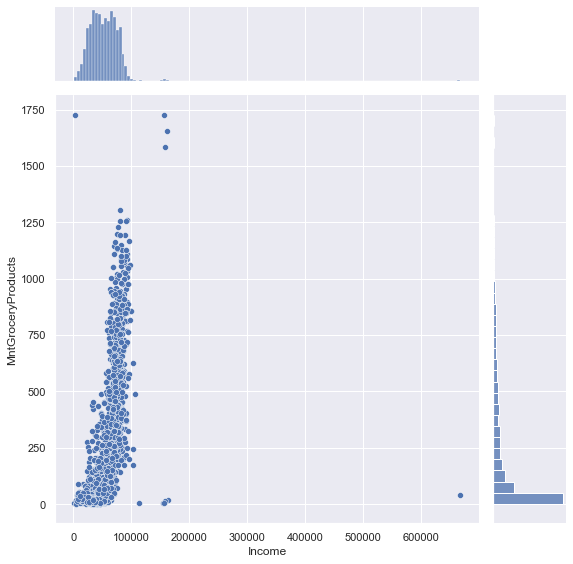

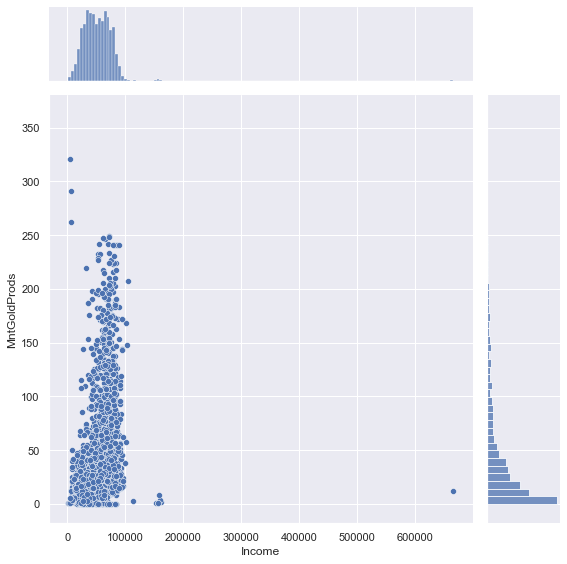

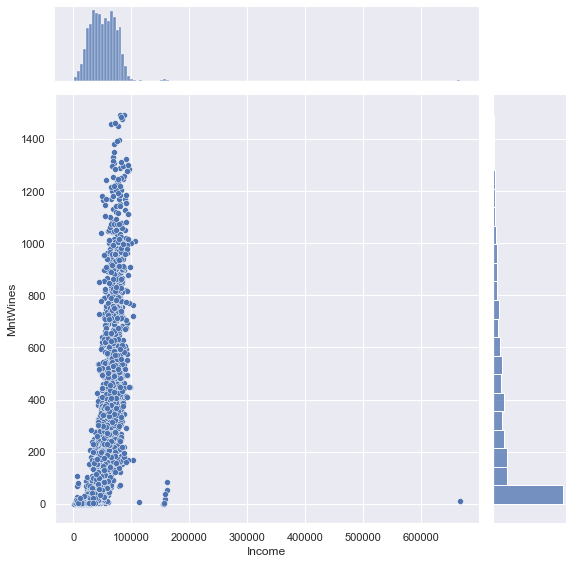

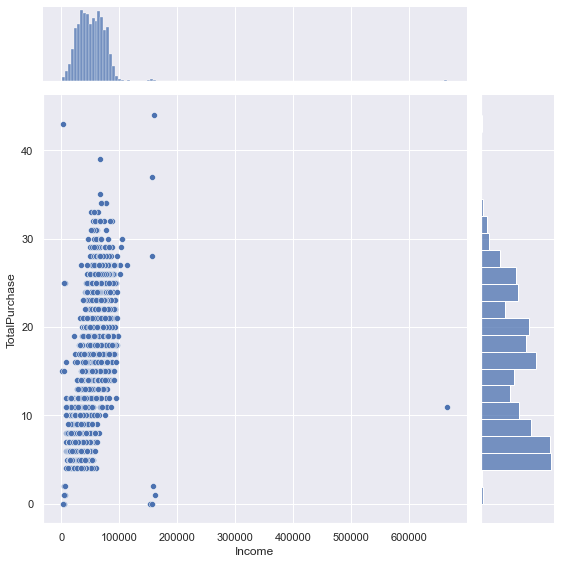

In [44]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_clean, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "MntGoldProds", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "TotalPurchase", height = 8)

<AxesSubplot:>

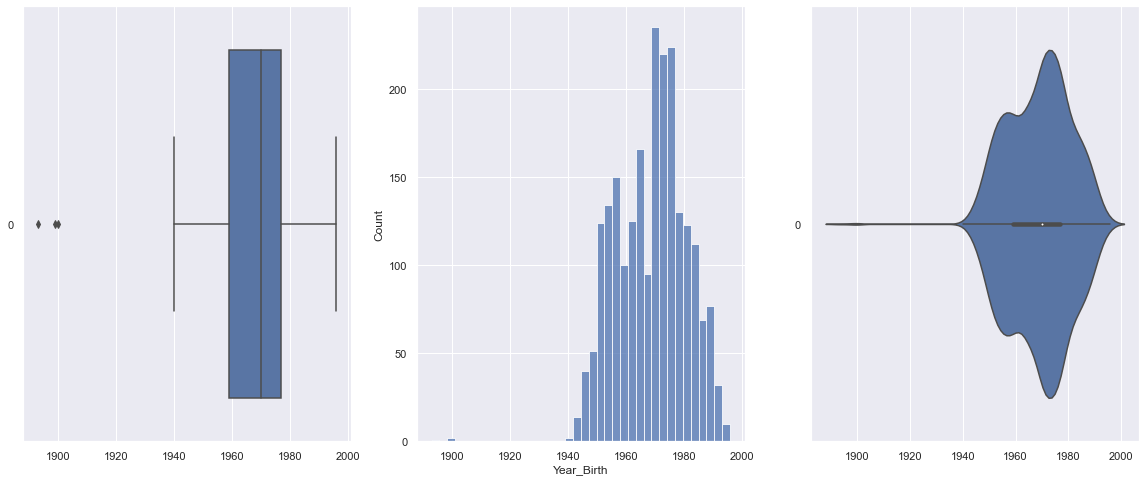

In [45]:
f, axes = plt.subplots(1,3, figsize=(20, 8))
sb.boxplot(data = customerData_clean['Year_Birth'], orient = "h", ax = axes[0])
sb.histplot(data = customerData_clean['Year_Birth'], ax = axes[1])
sb.violinplot(data = customerData_clean['Year_Birth'], orient = "h", ax = axes[2])

Number of YearRange: 8
1970    738
1960    506
1950    459
1980    363
1940    107
1990     60
1890      2
1900      1
Name: YearRange, dtype: int64


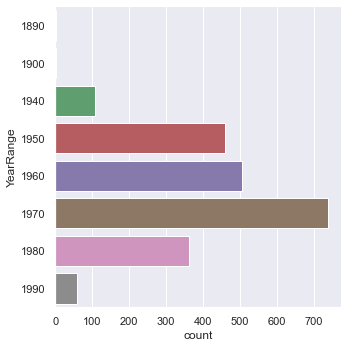

In [56]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of YearRange:", len(customerData_clean["YearRange"].unique()))

# Pokemons in each Generation
print(customerData_clean["YearRange"].value_counts())
sb.catplot(y = "YearRange", data = customerData_clean, kind = "count")

Number of NumWebVisitsMonth: 16
7     393
8     340
6     339
5     281
4     218
3     205
2     201
1     152
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64


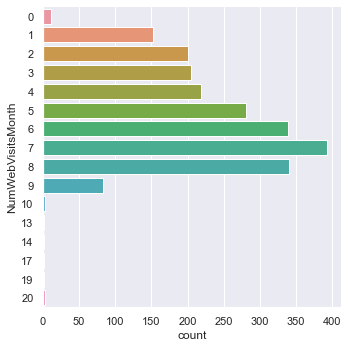

In [122]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of NumWebVisitsMonth:", len(customerData_clean["NumWebVisitsMonth"].unique()))

# Pokemons in each Generation
print(customerData_clean["NumWebVisitsMonth"].value_counts())
sb.catplot(y = "NumWebVisitsMonth", data = customerData_clean, kind = "count")

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='TotalPurchase'>

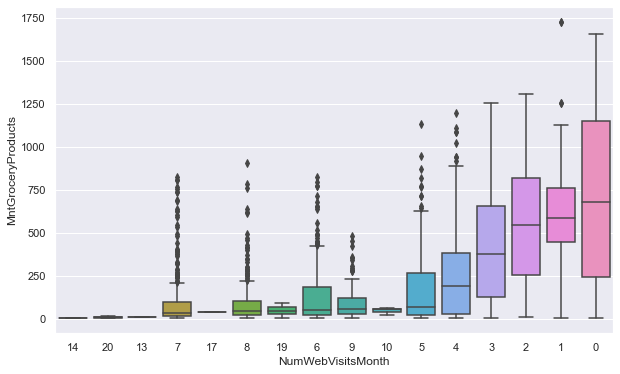

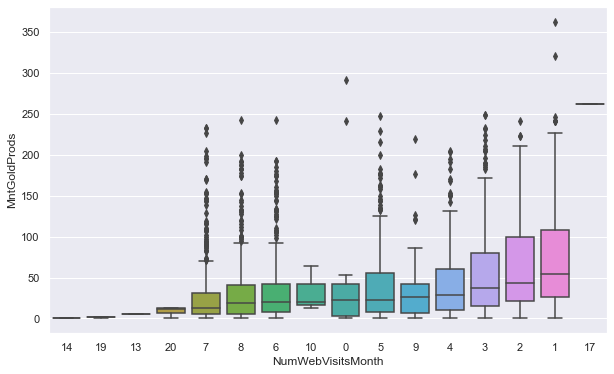

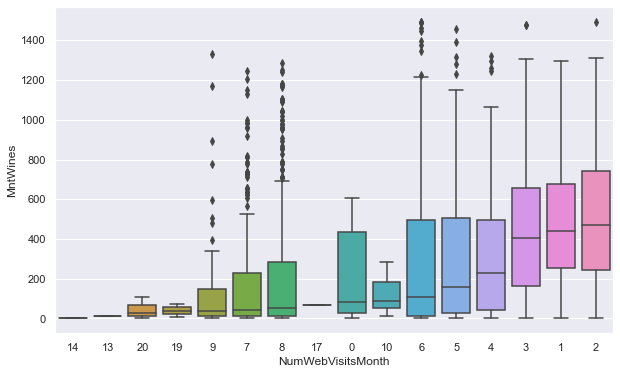

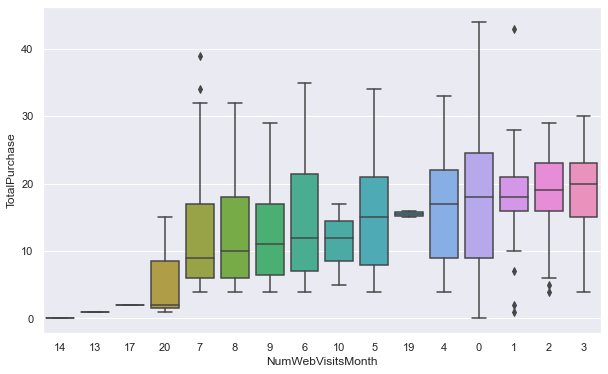

In [123]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['NumWebVisitsMonth', 'MntGroceryProducts']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['NumWebVisitsMonth'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['NumWebVisitsMonth', 'MntGoldProds']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['NumWebVisitsMonth'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['NumWebVisitsMonth', 'MntWines']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['NumWebVisitsMonth'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['NumWebVisitsMonth', 'TotalPurchase']].groupby(['NumWebVisitsMonth']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['NumWebVisitsMonth'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

<Figure size 144x432 with 0 Axes>

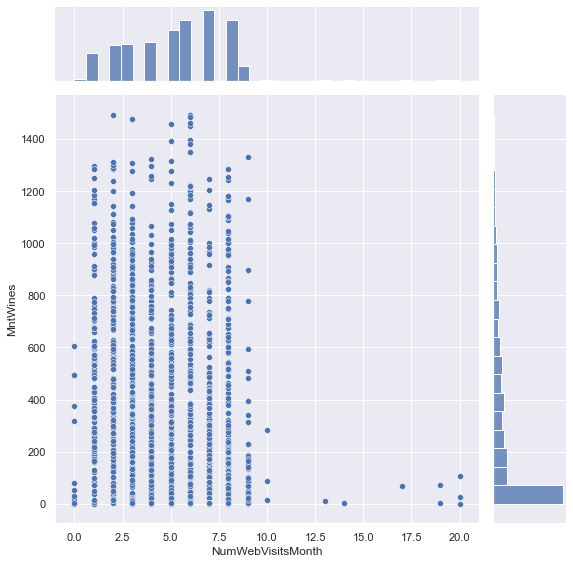

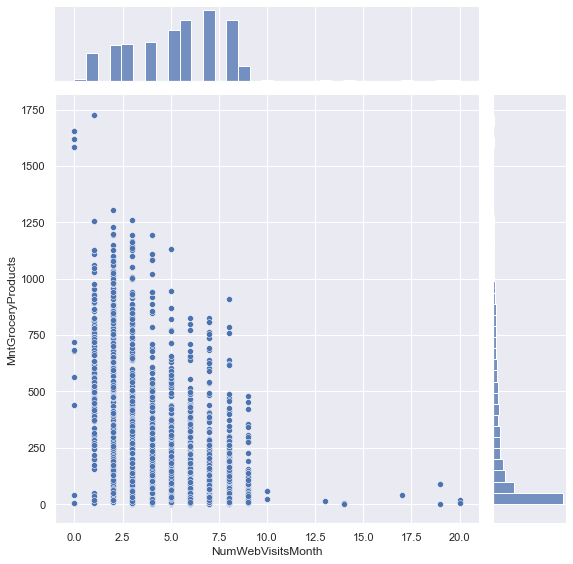

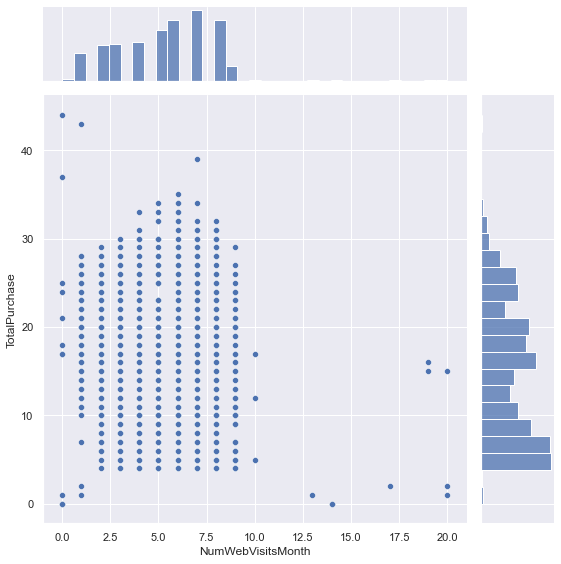

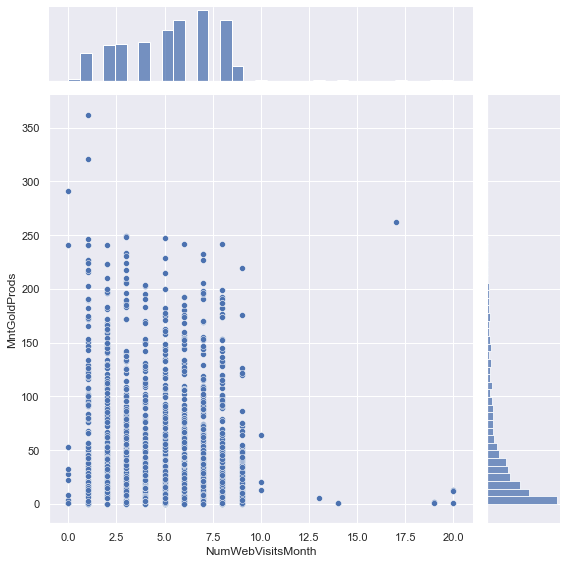

In [124]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_clean, x = "NumWebVisitsMonth", y = "MntWines", height = 8)
sb.jointplot(data = customerData_clean, x = "NumWebVisitsMonth", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = customerData_clean, x = "NumWebVisitsMonth", y = "TotalPurchase", height = 8)
sb.jointplot(data = customerData_clean, x = "NumWebVisitsMonth", y = "MntGoldProds", height = 8)

<Figure size 144x432 with 0 Axes>

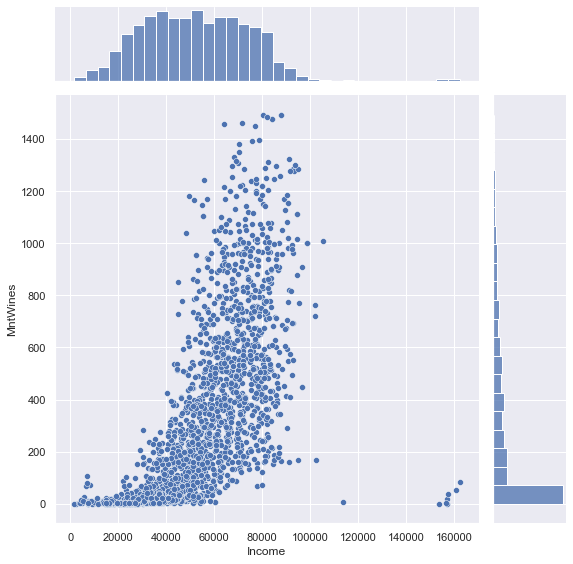

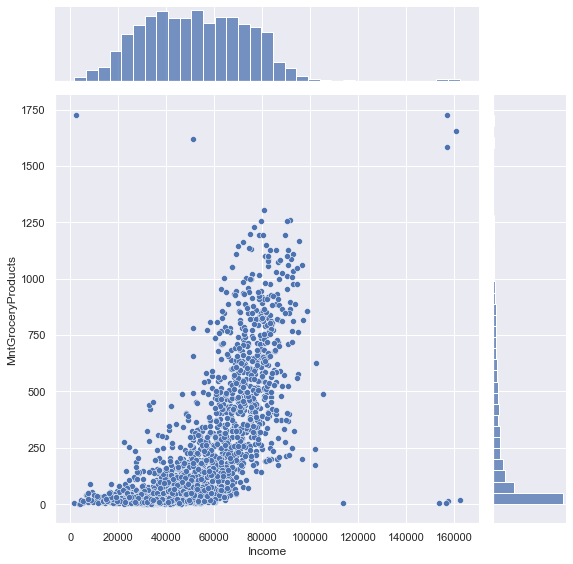

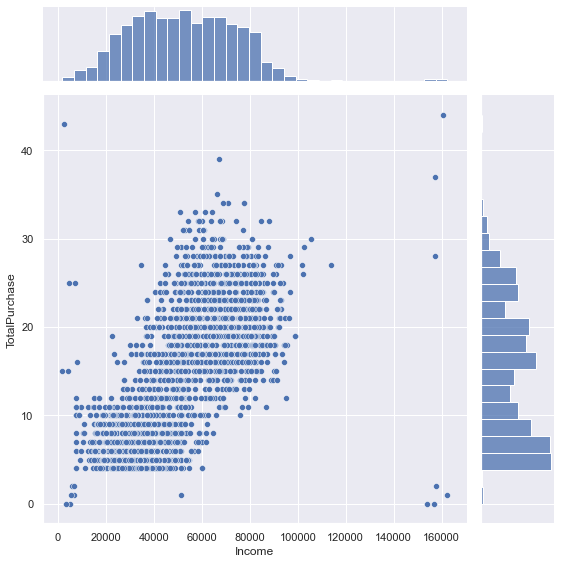

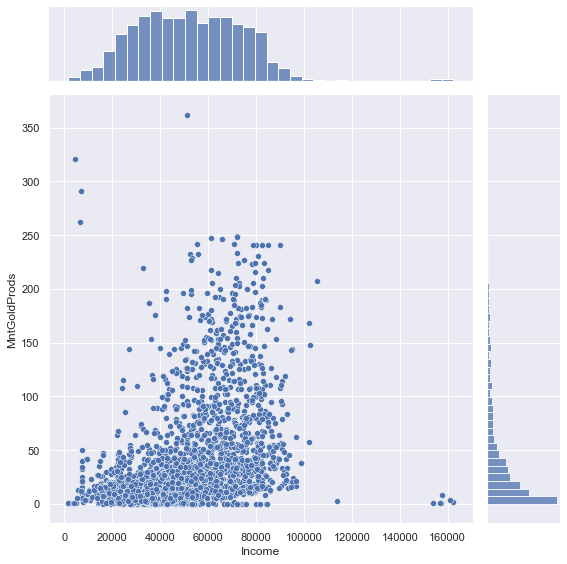

In [114]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_clean, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "TotalPurchase", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "MntGoldProds", height = 8)

<AxesSubplot:xlabel='Complain', ylabel='TotalPurchase'>

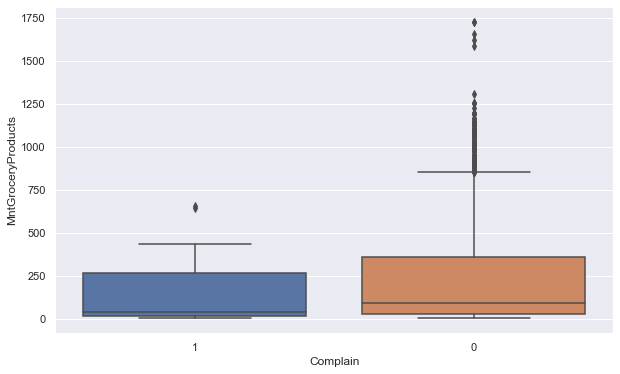

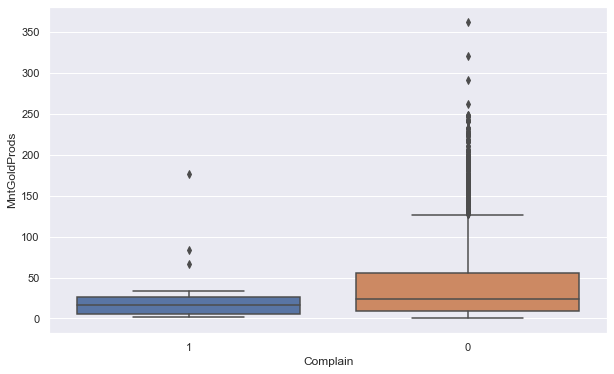

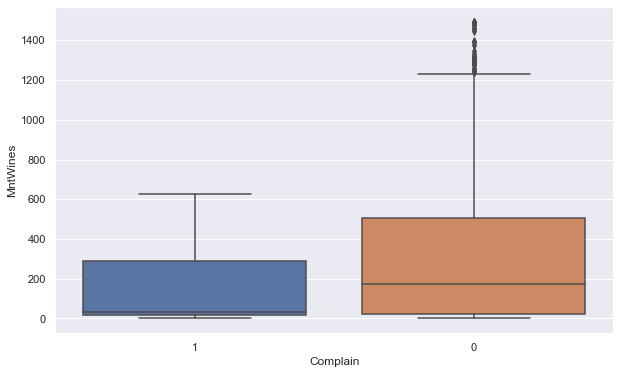

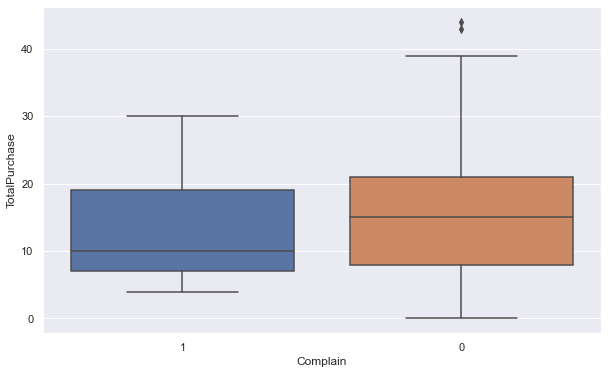

In [118]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Complain', 'MntGroceryProducts']].groupby(['Complain']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Complain'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Complain', 'MntGoldProds']].groupby(['Complain']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Complain'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Complain', 'MntWines']].groupby(['Complain']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Complain'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Complain', 'TotalPurchase']].groupby(['Complain']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Complain'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Recency', ylabel='TotalPurchase'>

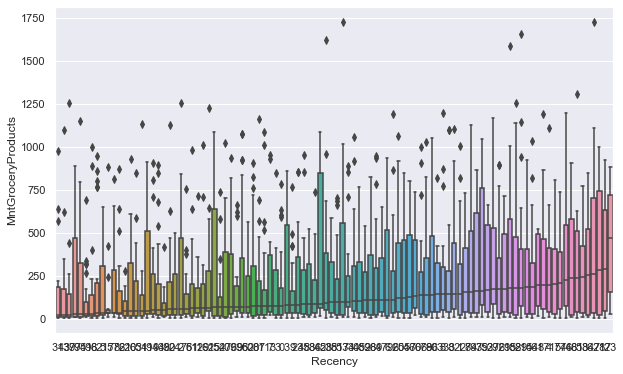

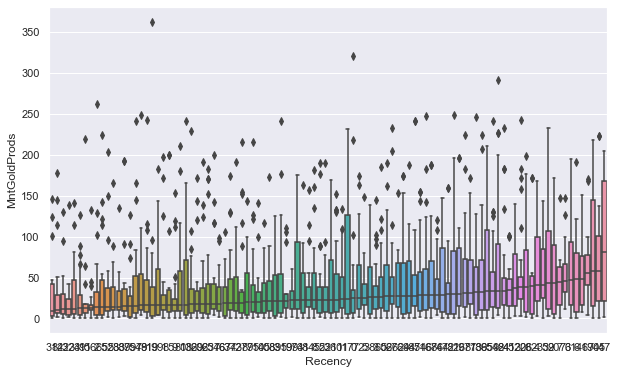

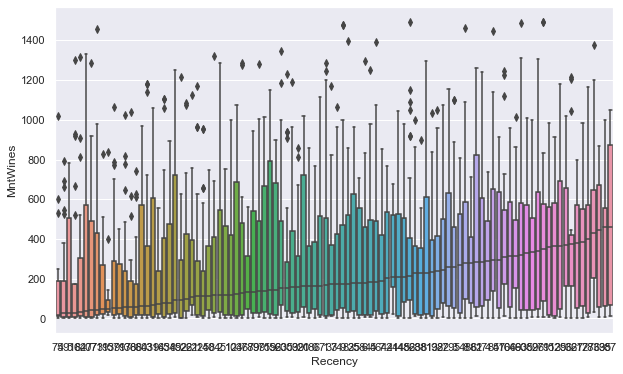

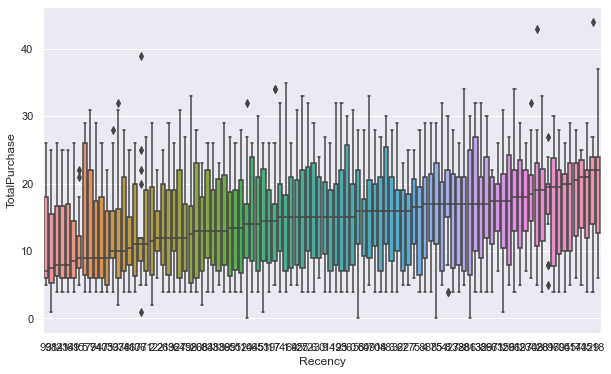

In [117]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Recency', 'MntGroceryProducts']].groupby(['Recency']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Recency'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Recency', 'MntGoldProds']].groupby(['Recency']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Recency'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Recency', 'MntWines']].groupby(['Recency']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Recency'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Recency', 'TotalPurchase']].groupby(['Recency']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Recency'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

## Reference
* [Source of Dataset (Kaggle)](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)
* [M2 BasicStatistics](https://ntulearn.ntu.edu.sg/webapps/blackboard/content/listContent.jsp?course_id=_2606895_1&content_id=_2762960_1)